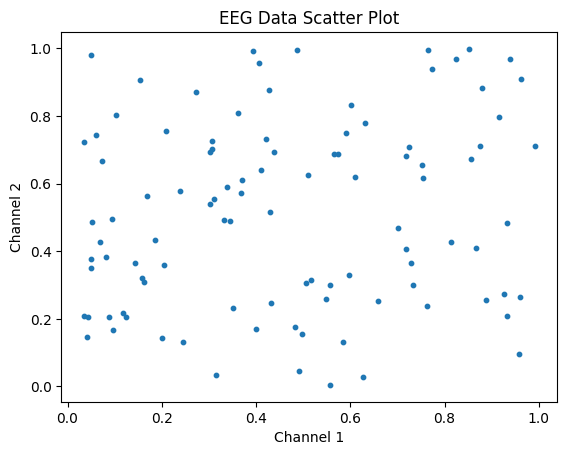

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load EEG data
eeg_data = np.load('eeg_data.npy')

# Create scatter plot using Matplotlib
plt.scatter(eeg_data[:, 0], eeg_data[:, 1], s=10)
plt.title('EEG Data Scatter Plot')
plt.xlabel('Channel 1')
plt.ylabel('Channel 2')
plt.show()

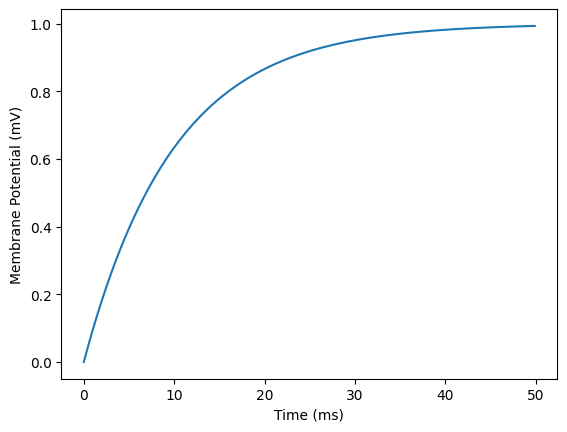

In [7]:
from brian2 import *

# Define model equations
tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

# Create neurons
presynaptic_neurons = NeuronGroup(3, 'v : 1', threshold='v>1', reset='v = 0', method='euler')
postsynaptic_neuron = NeuronGroup(1, eqs, method='euler')

# Set stimulus
stimulus = TimedArray([0, 0.5, 0], dt=1*ms)

# Create synapses
synapses = Synapses(presynaptic_neurons, postsynaptic_neuron, on_pre='v_post += 0.5')
synapses.connect(i=[0, 1, 2], j=0)

# Record membrane potential
trace = StateMonitor(postsynaptic_neuron, 'v', record=True)

# Run simulation
run(50*ms)

# Plot results
plot(trace.t/ms, trace.v[0])
xlabel('Time (ms)')
ylabel('Membrane Potential (mV)')
show()

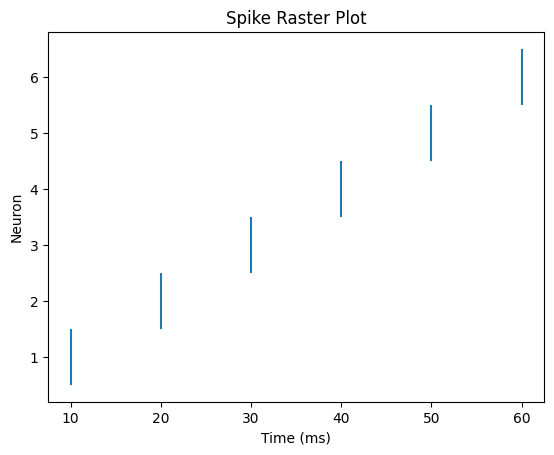

In [17]:
import neo
import matplotlib.pyplot as plt
import numpy as np
from quantities import ms

# Load spike train data
spike_times = np.array([10, 20, 30, 40, 50, 60])
spike_train = neo.SpikeTrain(spike_times * ms, t_stop=70*ms)

# Create raster plot using Matplotlib
fig, ax = plt.subplots()
for i in range(len(spike_train)):
    ax.vlines(spike_train[i], i + 0.5, i + 1.5)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Neuron')
ax.set_title('Spike Raster Plot')
plt.show()